In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# For better viewing
pd.set_option('display.max_columns',None)
df = pd.read_csv('sales(2).csv')
df.head()

,Date,Product,Units_Sold,Unit_Price
0,01-10-2025,A,10,50
1,02-10-2025,B,15,40
2,03-10-2025,C,8,60
3,04-10-2025,A,12,50


In [2]:
print(df.isnull().sum())

df.fillna(0,inplace=True)

df['Date'] = pd.to_datetime(df['Date'])

df.info()


Date          0
Product       0
Units_Sold    0
Unit_Price    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        4 non-null      datetime64[ns]
 1   Product     4 non-null      object        
 2   Units_Sold  4 non-null      int64         
 3   Unit_Price  4 non-null      int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 260.0+ bytes


In [5]:
df['Total_Sales'] = np.multiply(df['Units_Sold'],df['Unit_Price'])
df.head()

,Date,Product,Units_Sold,Unit_Price,Total_Sales
0,2025-01-10,A,10,50,500
1,2025-02-10,B,15,40,600
2,2025-03-10,C,8,60,480
3,2025-04-10,A,12,50,600


In [10]:
total_revenue = df['Total_Sales'].sum()
avg_units = df.groupby('Product')['Units_Sold'].mean()
top_product = df.groupby('Product')['Total_Sales'].sum().idxmax()

print(f" Total Revenue: (tatal_revenue)")
print("\n Average Units Sold per product:\n",avg_units)
print(f"\n Top selling product: (top_product)")

 Total Revenue: (tatal_revenue)

 Average Units Sold per product:
 Product
A    11.0
B    15.0
C     8.0
Name: Units_Sold, dtype: float64

 Top selling product: (top_product)


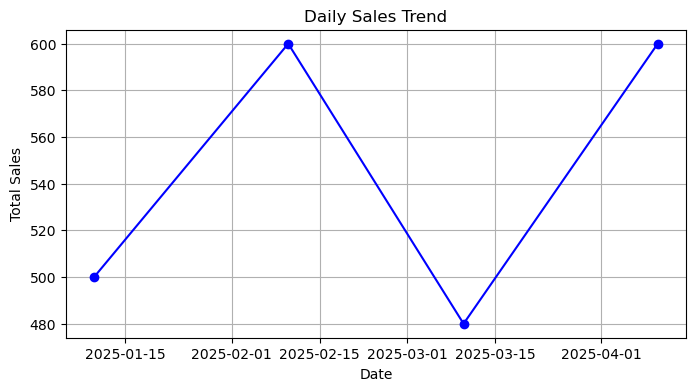

In [12]:
plt.figure(figsize=(8,4))
plt.plot(df['Date'], df['Total_Sales'],marker='o',color='blue')
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

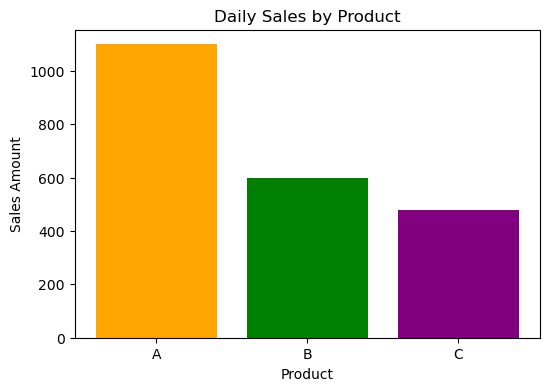

In [15]:
product_sales = df.groupby('Product')['Total_Sales'].sum()

plt.figure(figsize=(6,4))
plt.bar(product_sales.index, product_sales.values,color = ['orange','green','purple'])
plt.title('Daily Sales by Product')
plt.xlabel('Product')
plt.ylabel('Sales Amount')
plt.show()